In [1]:
import pandas
import time

In [2]:
data = pandas.read_excel('articlesPreProcessed.xlsx')
articles = data.copy()
articles.tail(3)

,id,news_desk,pub_date,section,source,type,url,word_count,locations,subjects,headline,snippet,headlineSnippet,tokens,tokensNoPunc,tokensFiltered,postag,stem,lemma
21458,5c8acca540d36ff0707a71ed,National,2018-12-31,U.S.,The New York Times,News,https://www.nytimes.com/2018/12/31/us/joyful-h...,1093,"['Hollywood (Calif)', 'Harris County (Tex)']","['Race and Ethnicity', 'Hispanic-Americans', '...",Joyful Headlines About Race and Equality,"A few stories about race, from the many we pub...",Joyful Headlines About Race and Equality - A f...,Joyful Headlines About Race and Equality - A f...,joyful headlines about race and equality a few...,joyful headlines race equality stories race ma...,JJ NNS NN NN NNS NN JJ VBN IN VBG,joy headlin race equal stori race mani publish...,joyful headline race equality story race many ...
21459,5c8abf1140d36ff0707722ba,Washington,2018-12-31,U.S.,The New York Times,News,https://www.nytimes.com/2018/12/30/us/politics...,1461,[],"['Shutdowns (Institutional)', 'Border Barriers...","Trump Digs In, Darkening Hopes for a Deal to E...","The president has repeatedly called allies, re...","Trump Digs In, Darkening Hopes for a Deal to E...","Trump Digs In , Darkening Hopes for a Deal to ...",trump digs in darkening hopes for a deal to en...,trump digs darkening hopes deal end shutdown p...,NN NNS VBG NNS JJ JJ NN NN RB VBD NNS VBG NN N...,trump dig darken hope deal end shutdown presid...,trump dig darkening hope deal end shutdown pre...
21460,5c8ae37240d36ff070800a33,U.S.,2018-12-31,U.S.,The New York Times,Interactive Feature,https://www.nytimes.com/interactive/2018/us/20...,0,[],['Two Thousand Eighteen'],2018: The Year in Visual Stories and Graphics,"Selected Times graphics, visualizations and mu...",2018: The Year in Visual Stories and Graphics ...,2018 : The Year in Visual Stories and Graphics...,2018 the year in visual stories and graphics s...,2018 year visual stories graphics selected tim...,CD NN JJ NNS NNS VBD NNS JJ NNS NN NNS CD,2018 year visual stori graphic select time gra...,2018 year visual story graphic selected time g...


# Polarity Example4 with SentiWord Dictionary

In [3]:
# look into using Vadar or Textblob for sentiment
# https://towardsdatascience.com/ranking-news-bias-in-python-e9bb5d1ba93f

In [4]:
lexicon_dict = open("SentiWordNet Dictionary.txt",'r')
lexicon_dict1 = lexicon_dict.readlines()
lexicon_dict.close()

In [5]:
lexicon_dict1[100]

'a\t00016247\t0.125\t0.5\tsuperabundant#1\tmost excessively abundant\n'

In [6]:
lexicon_dict1[100].split('\t')[4].split('#')

['superabundant', '1']

In [7]:
lexicon = {} # dict with words and a sentiment score
for line in lexicon_dict1:
    info = line.split("\t")
    try:
        p_score = float(info[2]) # pos score
        n_score = float(info[3]) * -1.0 # neg score
        words = info[4].split(" ") # word with this score
        for word in words:
            term = word.split("#")
            lexicon[term[0]]= p_score + n_score # average pos and negative score
    except:
        pass

#lexicon

In [8]:
polarity = []
keys = lexicon.keys()

for i in articles.tokensFiltered:
    score = 0.0
    for word in i.split():
        if word in keys:
            score = score + lexicon[word]
        else:
            score = score + 0
    polarity.append(score)
    
#polarity

In [9]:
print(len(polarity) == len(articles))

polarity = pandas.DataFrame({'polaritySentiWord' : polarity})
polarity.tail()

True


,polaritySentiWord
21456,-0.125
21457,0.500
21458,0.125
21459,0.750
21460,0.625


In [10]:
articles = articles.join(polarity)
articles.tail(3)

,id,news_desk,pub_date,section,source,type,url,word_count,locations,subjects,headline,snippet,headlineSnippet,tokens,tokensNoPunc,tokensFiltered,postag,stem,lemma,polaritySentiWord
21458,5c8acca540d36ff0707a71ed,National,2018-12-31,U.S.,The New York Times,News,https://www.nytimes.com/2018/12/31/us/joyful-h...,1093,"['Hollywood (Calif)', 'Harris County (Tex)']","['Race and Ethnicity', 'Hispanic-Americans', '...",Joyful Headlines About Race and Equality,"A few stories about race, from the many we pub...",Joyful Headlines About Race and Equality - A f...,Joyful Headlines About Race and Equality - A f...,joyful headlines about race and equality a few...,joyful headlines race equality stories race ma...,JJ NNS NN NN NNS NN JJ VBN IN VBG,joy headlin race equal stori race mani publish...,joyful headline race equality story race many ...,0.125
21459,5c8abf1140d36ff0707722ba,Washington,2018-12-31,U.S.,The New York Times,News,https://www.nytimes.com/2018/12/30/us/politics...,1461,[],"['Shutdowns (Institutional)', 'Border Barriers...","Trump Digs In, Darkening Hopes for a Deal to E...","The president has repeatedly called allies, re...","Trump Digs In, Darkening Hopes for a Deal to E...","Trump Digs In , Darkening Hopes for a Deal to ...",trump digs in darkening hopes for a deal to en...,trump digs darkening hopes deal end shutdown p...,NN NNS VBG NNS JJ JJ NN NN RB VBD NNS VBG NN N...,trump dig darken hope deal end shutdown presid...,trump dig darkening hope deal end shutdown pre...,0.750
21460,5c8ae37240d36ff070800a33,U.S.,2018-12-31,U.S.,The New York Times,Interactive Feature,https://www.nytimes.com/interactive/2018/us/20...,0,[],['Two Thousand Eighteen'],2018: The Year in Visual Stories and Graphics,"Selected Times graphics, visualizations and mu...",2018: The Year in Visual Stories and Graphics ...,2018 : The Year in Visual Stories and Graphics...,2018 the year in visual stories and graphics s...,2018 year visual stories graphics selected tim...,CD NN JJ NNS NNS VBD NNS JJ NNS NN NNS CD,2018 year visual stori graphic select time gra...,2018 year visual story graphic selected time g...,0.625


In [11]:
'max: {} min: {}'.format(max(articles.polaritySentiWord),min(articles.polaritySentiWord))

'max: 4.125 min: -4.25'

In [12]:
import matplotlib.pyplot
articles.polaritySentiWord.hist(figsize = (15,5),bins = 32)
matplotlib.pyplot.title(' Article Polarity distribution')
matplotlib.pyplot.xlabel(' Polarity')
matplotlib.pyplot.ylabel(' Number of Articles')
matplotlib.pyplot.show()

<Figure size 1500x500 with 1 Axes>

In [13]:
sentiment = []

for i in articles.polaritySentiWord:
    if i < -0.5:
        sentiment.append('negative')
    elif i > 0.5:
        sentiment.append('positive')
    else:
        sentiment.append('neutral')
print(len(sentiment) == len(articles.polaritySentiWord))

True


In [14]:
sentiment = pandas.DataFrame({'sentimentSentiWord' : sentiment})
sentiment.tail()

,sentimentSentiWord
21456,neutral
21457,neutral
21458,neutral
21459,positive
21460,positive


In [15]:
articles = articles.join(sentiment)
articles.tail(3)

,id,news_desk,pub_date,section,source,type,url,word_count,locations,subjects,...,snippet,headlineSnippet,tokens,tokensNoPunc,tokensFiltered,postag,stem,lemma,polaritySentiWord,sentimentSentiWord
21458,5c8acca540d36ff0707a71ed,National,2018-12-31,U.S.,The New York Times,News,https://www.nytimes.com/2018/12/31/us/joyful-h...,1093,"['Hollywood (Calif)', 'Harris County (Tex)']","['Race and Ethnicity', 'Hispanic-Americans', '...",...,"A few stories about race, from the many we pub...",Joyful Headlines About Race and Equality - A f...,Joyful Headlines About Race and Equality - A f...,joyful headlines about race and equality a few...,joyful headlines race equality stories race ma...,JJ NNS NN NN NNS NN JJ VBN IN VBG,joy headlin race equal stori race mani publish...,joyful headline race equality story race many ...,0.125,neutral
21459,5c8abf1140d36ff0707722ba,Washington,2018-12-31,U.S.,The New York Times,News,https://www.nytimes.com/2018/12/30/us/politics...,1461,[],"['Shutdowns (Institutional)', 'Border Barriers...",...,"The president has repeatedly called allies, re...","Trump Digs In, Darkening Hopes for a Deal to E...","Trump Digs In , Darkening Hopes for a Deal to ...",trump digs in darkening hopes for a deal to en...,trump digs darkening hopes deal end shutdown p...,NN NNS VBG NNS JJ JJ NN NN RB VBD NNS VBG NN N...,trump dig darken hope deal end shutdown presid...,trump dig darkening hope deal end shutdown pre...,0.750,positive
21460,5c8ae37240d36ff070800a33,U.S.,2018-12-31,U.S.,The New York Times,Interactive Feature,https://www.nytimes.com/interactive/2018/us/20...,0,[],['Two Thousand Eighteen'],...,"Selected Times graphics, visualizations and mu...",2018: The Year in Visual Stories and Graphics ...,2018 : The Year in Visual Stories and Graphics...,2018 the year in visual stories and graphics s...,2018 year visual stories graphics selected tim...,CD NN JJ NNS NNS VBD NNS JJ NNS NN NNS CD,2018 year visual stori graphic select time gra...,2018 year visual story graphic selected time g...,0.625,positive


In [16]:
articles.sentimentSentiWord.value_counts()

neutral     12931
positive     4869
negative     3661
Name: sentimentSentiWord, dtype: int64

# Polarity Vader
 https://medium.com/analytics-vidhya/simplifying-social-media-sentiment-analysis-using-vader-in-python-f9e6ec6fc52f
<br>VADER (Valence Aware Dictionary and Sentiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media. VADER has been found to be quite successful when dealing with social media texts, NY Times editorials, movie reviews, and product reviews.
https://github.com/cjhutto/vaderSentiment#about-the-scoring

In [17]:
#!pip install vaderSentiment

In [18]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [19]:
polarity = []
Vpos = []
Vneg = []
#Vadar uses untokenized and unfiltered sentences. Punctuation affects score!
# Vader returns 4 things, neg %, neutral %, pos %, compound %
# The Compound score is a metric that calculates the sum of all the lexicon ratings which have been normalized 
# between -1(most extreme negative) and +1 (most extreme positive)

for i in articles.headlineSnippet:
    score = analyser.polarity_scores(i)
    polarity.append(score['compound'])
    Vpos.append(score['pos'])
    Vneg.append(score['neg'])
    
polarity[:15]

[-0.8225,
 -0.5994,
 -0.6956,
 -0.4341,
 -0.1381,
 -0.4215,
 -0.9042,
 -0.3818,
 0.0,
 0.0,
 -0.3818,
 0.2486,
 -0.25,
 -0.3818,
 0.09]

In [20]:
print(len(polarity) == len(articles))
print(len(Vpos) == len(articles))
print(len(Vneg) == len(articles))

polarity = pandas.DataFrame({'Vpolarity' : polarity, 'Vpos' : Vpos, 'Vneg' : Vneg})
polarity.tail()

True
True
True


,Vpolarity,Vpos,Vneg
21456,0.4215,0.132,0.000
21457,0.0000,0.000,0.000
21458,0.8591,0.373,0.000
21459,0.3195,0.085,0.033
21460,0.0000,0.000,0.000


In [21]:
articles = articles.join(polarity)
articles.tail(3)

,id,news_desk,pub_date,section,source,type,url,word_count,locations,subjects,...,tokensNoPunc,tokensFiltered,postag,stem,lemma,polaritySentiWord,sentimentSentiWord,Vpolarity,Vpos,Vneg
21458,5c8acca540d36ff0707a71ed,National,2018-12-31,U.S.,The New York Times,News,https://www.nytimes.com/2018/12/31/us/joyful-h...,1093,"['Hollywood (Calif)', 'Harris County (Tex)']","['Race and Ethnicity', 'Hispanic-Americans', '...",...,joyful headlines about race and equality a few...,joyful headlines race equality stories race ma...,JJ NNS NN NN NNS NN JJ VBN IN VBG,joy headlin race equal stori race mani publish...,joyful headline race equality story race many ...,0.125,neutral,0.8591,0.373,0.000
21459,5c8abf1140d36ff0707722ba,Washington,2018-12-31,U.S.,The New York Times,News,https://www.nytimes.com/2018/12/30/us/politics...,1461,[],"['Shutdowns (Institutional)', 'Border Barriers...",...,trump digs in darkening hopes for a deal to en...,trump digs darkening hopes deal end shutdown p...,NN NNS VBG NNS JJ JJ NN NN RB VBD NNS VBG NN N...,trump dig darken hope deal end shutdown presid...,trump dig darkening hope deal end shutdown pre...,0.750,positive,0.3195,0.085,0.033
21460,5c8ae37240d36ff070800a33,U.S.,2018-12-31,U.S.,The New York Times,Interactive Feature,https://www.nytimes.com/interactive/2018/us/20...,0,[],['Two Thousand Eighteen'],...,2018 the year in visual stories and graphics s...,2018 year visual stories graphics selected tim...,CD NN JJ NNS NNS VBD NNS JJ NNS NN NNS CD,2018 year visual stori graphic select time gra...,2018 year visual story graphic selected time g...,0.625,positive,0.0000,0.000,0.000


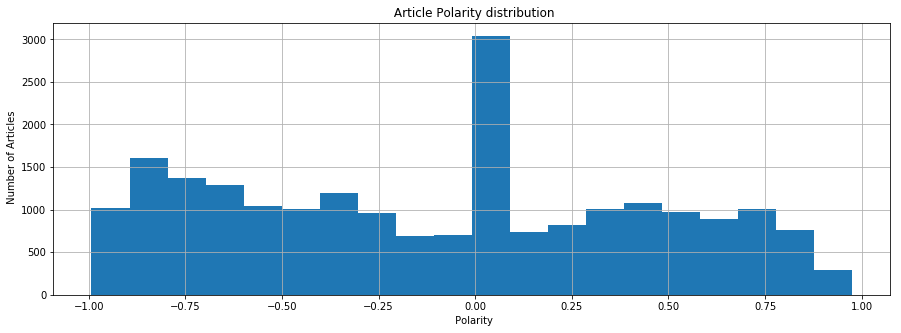

In [22]:
import matplotlib.pyplot
articles.Vpolarity.hist(figsize = (15,5),bins = 20)
matplotlib.pyplot.title(' Article Polarity distribution')
matplotlib.pyplot.xlabel(' Polarity')
matplotlib.pyplot.ylabel(' Number of Articles')
matplotlib.pyplot.show()

In [23]:
sentiment = []

for i in articles.Vpolarity:
    if i < -0.5:
        sentiment.append('negative')
    elif i > 0.5:
        sentiment.append('positive')
    else:
        sentiment.append('neutral')
print(len(sentiment) == len(articles))

True


In [24]:
sentiment = pandas.DataFrame({'Vsentiment' : sentiment})
sentiment.tail()

,Vsentiment
21456,neutral
21457,neutral
21458,positive
21459,neutral
21460,neutral


In [25]:
articles = articles.join(sentiment)
articles.tail(3)

,id,news_desk,pub_date,section,source,type,url,word_count,locations,subjects,...,tokensFiltered,postag,stem,lemma,polaritySentiWord,sentimentSentiWord,Vpolarity,Vpos,Vneg,Vsentiment
21458,5c8acca540d36ff0707a71ed,National,2018-12-31,U.S.,The New York Times,News,https://www.nytimes.com/2018/12/31/us/joyful-h...,1093,"['Hollywood (Calif)', 'Harris County (Tex)']","['Race and Ethnicity', 'Hispanic-Americans', '...",...,joyful headlines race equality stories race ma...,JJ NNS NN NN NNS NN JJ VBN IN VBG,joy headlin race equal stori race mani publish...,joyful headline race equality story race many ...,0.125,neutral,0.8591,0.373,0.000,positive
21459,5c8abf1140d36ff0707722ba,Washington,2018-12-31,U.S.,The New York Times,News,https://www.nytimes.com/2018/12/30/us/politics...,1461,[],"['Shutdowns (Institutional)', 'Border Barriers...",...,trump digs darkening hopes deal end shutdown p...,NN NNS VBG NNS JJ JJ NN NN RB VBD NNS VBG NN N...,trump dig darken hope deal end shutdown presid...,trump dig darkening hope deal end shutdown pre...,0.750,positive,0.3195,0.085,0.033,neutral
21460,5c8ae37240d36ff070800a33,U.S.,2018-12-31,U.S.,The New York Times,Interactive Feature,https://www.nytimes.com/interactive/2018/us/20...,0,[],['Two Thousand Eighteen'],...,2018 year visual stories graphics selected tim...,CD NN JJ NNS NNS VBD NNS JJ NNS NN NNS CD,2018 year visual stori graphic select time gra...,2018 year visual story graphic selected time g...,0.625,positive,0.0000,0.000,0.000,neutral


In [26]:
articles.Vsentiment.value_counts()

neutral     11447
negative     6318
positive     3696
Name: Vsentiment, dtype: int64

# Bag of Words / Word Frequency

In [27]:
'Average word count per Articles is {} words'.format(round(articles.word_count.mean()))

'Average word count per Articles is 902 words'

In [28]:
All_wordsT = []
for i in articles.tokensFiltered:
    All_wordsT.extend(i.split())
    
VocabularyT = set(All_wordsT)

print('# of tokenized words {}'.format(len(All_wordsT)))
print('# of unique tokenized words {}'.format(len(VocabularyT)))

# of tokenized words 466470
# of unique tokenized words 29180


In [29]:
All_wordsS = []
for i in articles.stem:
    All_wordsS.extend(i.split())
    
VocabularyS = set(All_wordsS)

print('# of word stems {}'.format(len(All_wordsS)))
print('# of unique word stems {}'.format(len(VocabularyS)))

# of word stems 466470
# of unique word stems 18952


In [30]:
All_wordsL = []
for i in articles.lemma:
    All_wordsL.extend(i.split())
    
VocabularyL = set(All_wordsL)

print('# of word lemmas {}'.format(len(All_wordsL)))
print('# of unique word lemmas {}'.format(len(VocabularyL)))

# of word lemmas 466470
# of unique word lemmas 25514


# Focus on Lemmas

In [31]:
import nltk

In [32]:
word_Distribution = nltk.FreqDist(All_wordsL)
#word_Distribution # for entire text Most common words

In [33]:
word_Distribution.most_common(200)
#look to see if they make sense and if there are any words that are meaningless and too frequent
# add to blacklist

[('trump', 10440),
 ('president', 4320),
 ('state', 2910),
 ('republican', 2904),
 ('donald', 2801),
 ('new', 2679),
 ('mr.', 2583),
 ('said', 2537),
 ('clinton', 2449),
 ('say', 2086),
 ('house', 1997),
 ('campaign', 1585),
 ('court', 1518),
 ('hillary', 1514),
 ('would', 1420),
 ('california', 1377),
 ('senator', 1342),
 ('democrat', 1338),
 ('year', 1300),
 ('white', 1259),
 ('election', 1246),
 ('police', 1202),
 ('one', 1198),
 ('senate', 1190),
 ('official', 1133),
 ('first', 1113),
 ('people', 1040),
 ('time', 1033),
 ('could', 1021),
 ('obama', 995),
 ('law', 970),
 ('woman', 961),
 ('american', 952),
 ('candidate', 947),
 ('two', 935),
 ('day', 929),
 ('plan', 913),
 ('case', 908),
 ('party', 898),
 ('federal', 896),
 ('bill', 895),
 ('shooting', 890),
 ('administration', 884),
 ('former', 884),
 ('voter', 884),
 ('sander', 882),
 ('health', 878),
 ('democratic', 875),
 ('justice', 869),
 ('week', 867),
 ('race', 866),
 ('national', 863),
 ('supreme', 854),
 ('presidential', 8

In [34]:
hapaxe = word_Distribution.hapaxes()
len(word_Distribution.hapaxes()) # occur only once

9864

# Collocations = Multi Word Expressions / Name Entity Recognition

In [35]:
_2gram = list(nltk.bigrams(All_wordsL))
_2gramDist = nltk.FreqDist(_2gram)
_2gramDist.most_common(100)

[(('donald', 'trump'), 2769),
 (('president', 'trump'), 1831),
 (('hillary', 'clinton'), 1496),
 (('mr.', 'trump'), 1073),
 (('white', 'house'), 928),
 (('supreme', 'court'), 853),
 (('bernie', 'sander'), 644),
 (('new', 'york'), 592),
 (('california', 'today'), 547),
 (('united', 'state'), 543),
 (('ted', 'cruz'), 455),
 (('trump', 'administration'), 425),
 (('mrs.', 'clinton'), 379),
 (('health', 'care'), 336),
 (('attorney', 'general'), 331),
 (('new', 'hampshire'), 277),
 (('president', 'obama'), 257),
 (('north', 'carolina'), 250),
 (('trump', 'campaign'), 244),
 (('care', 'act'), 240),
 (('police', 'officer'), 237),
 (('affordable', 'care'), 234),
 (('marco', 'rubio'), 220),
 (('los', 'angeles'), 215),
 (('york', 'time'), 214),
 (('justice', 'department'), 213),
 (('south', 'carolina'), 210),
 (('trump', 'said'), 206),
 (('national', 'security'), 204),
 (('special', 'counsel'), 191),
 (('north', 'korea'), 186),
 (('said', 'would'), 183),
 (('secretary', 'state'), 183),
 (('offici

In [36]:
MWE2 = []

for i in _2gramDist.most_common(100):
    MWE2.append(i[0])
    
MWE2 # eliminate unnecessary ones consider increase most common

[('donald', 'trump'),
 ('president', 'trump'),
 ('hillary', 'clinton'),
 ('mr.', 'trump'),
 ('white', 'house'),
 ('supreme', 'court'),
 ('bernie', 'sander'),
 ('new', 'york'),
 ('california', 'today'),
 ('united', 'state'),
 ('ted', 'cruz'),
 ('trump', 'administration'),
 ('mrs.', 'clinton'),
 ('health', 'care'),
 ('attorney', 'general'),
 ('new', 'hampshire'),
 ('president', 'obama'),
 ('north', 'carolina'),
 ('trump', 'campaign'),
 ('care', 'act'),
 ('police', 'officer'),
 ('affordable', 'care'),
 ('marco', 'rubio'),
 ('los', 'angeles'),
 ('york', 'time'),
 ('justice', 'department'),
 ('south', 'carolina'),
 ('trump', 'said'),
 ('national', 'security'),
 ('special', 'counsel'),
 ('north', 'korea'),
 ('said', 'would'),
 ('secretary', 'state'),
 ('official', 'said'),
 ('trump', 'say'),
 ('puerto', 'rico'),
 ('last', 'year'),
 ('john', 'kasich'),
 ('senator', 'bernie'),
 ('election', 'result'),
 ('republican', 'presidential'),
 ('paul', 'ryan'),
 ('f.b.i', 'director'),
 ('civil', 'right

In [37]:
MWE2 =[ ('donald', 'trump'),('hillary', 'clinton'), ('white', 'house'), 
       ('supreme', 'court'), ('bernie', 'sander'), ('new', 'york'), ('united', 'state'), 
       ('ted', 'cruz'), ('health', 'care'), ('attorney', 'general'), ('new', 'hampshire'),
       ('president', 'obama'), ('north', 'carolina'), 
       ('marco', 'rubio'), ('los', 'angeles'), ('justice', 'department'), 
       ('south', 'carolina'), ('national', 'security'), ('special', 'counsel'), ('north', 'korea'), 
       ('secretary', 'state'), ('puerto', 'rico'), ('last', 'year'),
       ('john', 'kasich'), ('election', 'result'), ('republican', 'presidential'), ('paul', 'ryan'), 
       ('f.b.i', 'director'), ('civil', 'right'), ('climate', 'change'), ('la', 'vega'), ('law', 'enforcement'), 
       ('travel', 'ban'), ('midterm', 'election'), ('social', 'medium'), 
       ('presidential', 'candidate'), ('brett', 'kavanaugh'), ('federal', 'judge'), ('tax', 'cut'), ('high', 'school'), 
       ('obama', 'administration'), ('foreign', 'policy'), ('gun', 'control'), ('house', 'republican'), 
       ('court', 'nominee'), ('bill', 'clinton'), ('jeff', 'session'), ('national', 'convention'), ('james', 'comey'), 
       ('jeb', 'bush'), ('presidential', 'campaign'), ('san', 'francisco'), ('mike', 'penny'), ('homeland', 'security'), 
       ('senate', 'race'), ('tax', 'bill'), ('clinton', 'campaign'), ('sexual', 'assault'), ('justice', 'dept'), 
       ('president', 'obamas'), ('super', 'pac'), ('former', 'president'), 
       ('state', 'department'), ('mass', 'shooting'), ('chris', 'christie'), ('vice', 'president'), ('appeal', 'court') ]
# updated 2 MWE

In [38]:
from nltk.tokenize import MWETokenizer

In [39]:
bigramTokens = MWETokenizer(MWE2) 
# list of words we want to merge into Multi word expressions
mwe2list = []
for i in articles.lemma:
    mwe2list.extend(bigramTokens.tokenize(i.split())) # merging...
mwe2list

['protester',
 'denounce',
 'chicago',
 'mayor',
 'demonstrator',
 'upset',
 'conduct',
 'police',
 'chicago',
 'handling',
 'shooting',
 'officer',
 'gathered',
 'city',
 'hall',
 'demand',
 'mayor',
 'rahm',
 'emanuels',
 'resignation',
 'hillary_clinton',
 'raised',
 'million',
 'last',
 'month',
 'hillary_clinton',
 'presidential_campaign',
 'raised',
 'million',
 'three-month',
 'period',
 'ended',
 'dec.',
 'bringing',
 'total',
 'war',
 'chest',
 'use',
 'democratic',
 'presidential',
 'contest',
 '112',
 'million',
 'hillary_clinton',
 'email',
 'released',
 'state_department',
 'fall',
 'short',
 'message',
 'disclosed',
 'official',
 'fail',
 'meet',
 'judge',
 'requirement',
 'produce',
 'percent',
 'email',
 'end',
 'year',
 'manspreading',
 'vape',
 'hated',
 'word',
 '2016',
 'annual',
 'survey',
 'lake',
 'superior',
 'state',
 'university',
 'michigan',
 'compiles',
 'nomination',
 'flooding',
 'missouri',
 'raise',
 'vexing',
 'question',
 'greater',
 'defense',
 'erec

In [40]:
_3gram = list(nltk.trigrams(mwe2list))
_3gramDist = nltk.FreqDist(_3gram)
_3gramDist.most_common(100)

[(('affordable', 'care', 'act'), 234),
 (('see', 'full', 'result'), 113),
 (('full', 'result', 'map'), 113),
 (('election_result', 'see', 'full'), 103),
 (('president', 'trump', 'said'), 76),
 (('across', 'political', 'spectrum'), 72),
 (('right', 'left', 'react'), 65),
 (('writer', 'across', 'political'), 64),
 (('mr.', 'trump', 'said'), 55),
 (('repeal', 'affordable', 'care'), 53),
 (('national', 'briefing', 'news'), 53),
 (('update', 'around', 'country'), 52),
 (('briefing', 'news', 'update'), 49),
 (('news', 'update', 'around'), 49),
 (('primary', 'election_result', 'see'), 49),
 (('robert', 'mueller', 'iii'), 46),
 (('president', 'trump', 'former'), 40),
 (('christine', 'blasey', 'ford'), 40),
 (('justice', 'antonin', 'scalia'), 39),
 (('read', 'side', 'think'), 37),
 (('senator', 'bernie_sander', 'vermont'), 35),
 (('black', 'life', 'matter'), 35),
 (('senate', 'intelligence', 'committee'), 35),
 (('presumptive', 'republican', 'nominee'), 34),
 (('mr.', 'trump', 'campaign'), 33),

In [41]:
MWE3 = []

for i in _3gramDist.most_common(100):
    MWE3.append(i[0])
    
MWE3 # eliminate unnecessary ones consider increase most common

[('affordable', 'care', 'act'),
 ('see', 'full', 'result'),
 ('full', 'result', 'map'),
 ('election_result', 'see', 'full'),
 ('president', 'trump', 'said'),
 ('across', 'political', 'spectrum'),
 ('right', 'left', 'react'),
 ('writer', 'across', 'political'),
 ('mr.', 'trump', 'said'),
 ('repeal', 'affordable', 'care'),
 ('national', 'briefing', 'news'),
 ('update', 'around', 'country'),
 ('briefing', 'news', 'update'),
 ('news', 'update', 'around'),
 ('primary', 'election_result', 'see'),
 ('robert', 'mueller', 'iii'),
 ('president', 'trump', 'former'),
 ('christine', 'blasey', 'ford'),
 ('justice', 'antonin', 'scalia'),
 ('read', 'side', 'think'),
 ('senator', 'bernie_sander', 'vermont'),
 ('black', 'life', 'matter'),
 ('senate', 'intelligence', 'committee'),
 ('presumptive', 'republican', 'nominee'),
 ('mr.', 'trump', 'campaign'),
 ('senate', 'judiciary', 'committee'),
 ('judge', 'merrick', 'garland'),
 ('iowa', 'bus', 'tour'),
 ('senate', 'majority', 'leader'),
 ('president', 'bar

In [42]:
MWEall = [('donald', 'trump'), ('hillary', 'clinton'), ('white', 'house'), ('supreme', 'court'), 
          ('bernie', 'sander'), ('new', 'york'), ('united', 'state'), ('ted', 'cruz'), ('theresa', 'may'),
          ('health', 'care'), ('attorney', 'general'), ('new', 'hampshire'), ('president', 'obama'), 
          ('north', 'carolina'), ('marco', 'rubio'), ('los', 'angeles'), ('justice', 'department'), 
          ('south', 'carolina'), ('national', 'security'), ('special', 'counsel'), ('north', 'korea'), ('secretary', 'state'), 
          ('puerto', 'rico'), ('last', 'year'), ('john', 'kasich'), ('election', 'result'), 
          ('republican', 'presidential'), ('paul', 'ryan'), ('f.b.i', 'director'), ('civil', 'right'), ('climate', 'change'), 
          ('la', 'vega'), ('law', 'enforcement'), ('travel', 'ban'), ('midterm', 'election'), 
          ('social', 'medium'), ('presidential', 'candidate'), ('brett', 'kavanaugh'), ('federal', 'judge'), ('tax', 'cut'), 
          ('high', 'school'), ('obama', 'administration'), ('official', 'say'), ('foreign', 'policy'), ('gun', 'control'), 
          ('house', 'republican'), ('court', 'nominee'), ('bill', 'clinton'), ('jeff', 'session'), ('national', 'convention'), 
          ('james', 'comey'), ('jeb', 'bush'), ('presidential', 'campaign'), ('san', 'francisco'), ('mike', 'penny'), 
          ('homeland', 'security'), ('senate', 'race'), ('tax', 'bill'), ('clinton', 'campaign'), ('sexual', 'assault'), 
          ('justice', 'dept'), ('president', 'obamas'), ('super', 'pac'), 
          ('former', 'president'), ('state', 'department'), ('mass', 'shooting'), ('chris', 'christie'), ('vice', 'president'),
          ('appeal', 'court'), ('affordable', 'care', 'act'),
          ('robert', 'mueller'), ('christine', 'blasey', 'ford'), ('justice', 'antonin', 'scalia'), 
          ('black', 'life', 'matter'), ('senate', 'intelligence', 'committee'), ('presumptive', 'republican', 'nominee'), 
          ('senate', 'judiciary', 'committee'), ('judge', 'merrick', 'garland'), ('iowa', 'bus', 'tour'), 
          ('senate', 'majority', 'leader'), ('barack', 'obama'), ('gov', 'john_kasich'), 
          ('house', 'intelligence', 'committee'), ('lisa', 'lerer'), ('state', 'union', 'address'), 
          ('democratic', 'national', 'committee'), ('private', 'email', 'server'), ('mitch', 'mcconnell'), 
          ('martin', 'luther', 'king'), ('republican', 'national', 'committee'), ('congressional', 'budget', 'office'), 
          ('former', 'campaign', 'chairman'), ('gov', 'jerry', 'brown'), ('senator', 'john', 'mccain'), 
          ('president', 'vladimir', 'putin'), ('judge', 'neil', 'gorsuch'), ('white_house', 'press', 'secretary'), 
          ('white_house', 'chief', 'staff'), ('president', 'trump', 'supreme_court'), ('mike', 'pompeo'), 
          ('health', 'human', 'service'), ('flint', 'water', 'crisis'), ('gov', 'rick', 'snyder'), 
          ('secretary', 'betsy', 'devos'), ('former', 'national_security', 'adviser'), ('unarmed', 'black', 'man'), 
          ('environmental', 'protection', 'agency'), ('barack', 'obama'), ('stoneman', 'douglas', 'high_school'), 
          ('new_york', 'time', 'reporter'), ('iran', 'nuclear', 'deal'), ('justice', 'anthony', 'kennedy'), 
          ('gov', 'rick', 'scott'), ('president', 'trump'), ('rex', 'tillerson'), ('marjory', 'stoneman', 'douglas'), 
          ('attorney_general', 'loretta', 'lynch'), ('freddie', 'gray'), ('air', 'force', 'one'), 
          ('young', 'undocumented', 'immigrant'), ('fatal', 'police', 'shooting') ]

In [43]:
print(time.ctime())
MultiWordExpressions = MWETokenizer(MWEall) 
# list of words we want to merge into Multi word expressions
blacklist = ['mr.','could','may','82117','said','say','8216','mrs', 'would','...', '8217', 'went', 'many', 'take', 'make', 
             'like','see','even','get', 'come','also', 'also','ms.' ] # from analyzing common words

NER = ['president_trump','donald_trump'] # name entity recognition
MWE = []
for i in articles.lemma:
    multi = MultiWordExpressions.tokenize(i.split()) # merging...
    for n,j in enumerate(multi):
        if j in blacklist:
            multi.remove(j) # remove words that are too common and meaningless
        if j in hapaxe:
            multi.remove(j) # remove rare words
        if j in NER:
            multi[n] = 'trump'
    MWE.append(' '.join(multi))

Fri Apr 26 19:20:01 2019


In [44]:
MWE[:10]

['protester denounce chicago mayor demonstrator upset conduct police chicago handling shooting officer gathered city hall demand mayor rahm emanuels resignation',
 'hillary_clinton raised million last month hillary_clinton presidential_campaign raised million period ended dec. bringing total war chest use democratic presidential contest million',
 'hillary_clinton email released state_department fall short message disclosed official fail meet judge requirement produce percent email end year',
 'vape hated word 2016 annual survey lake superior state university michigan nomination',
 'flooding missouri raise vexing question greater defense erected home stilt time community pack leave',
 'gun-friendly texas getting friendlier friday new law took effect allows texan permit carry concealed weapon openly carry weapon',
 'freddie_gray complained bad back arrest filing court document made public thursday suggests defense lawyer argue gray already injured loaded baltimore police van',
 'f.b.i a

In [45]:
MWE = pandas.DataFrame({'MWE' : MWE})
articles = articles.join(MWE)
articles.tail(3)

,id,news_desk,pub_date,section,source,type,url,word_count,locations,subjects,...,postag,stem,lemma,polaritySentiWord,sentimentSentiWord,Vpolarity,Vpos,Vneg,Vsentiment,MWE
21458,5c8acca540d36ff0707a71ed,National,2018-12-31,U.S.,The New York Times,News,https://www.nytimes.com/2018/12/31/us/joyful-h...,1093,"['Hollywood (Calif)', 'Harris County (Tex)']","['Race and Ethnicity', 'Hispanic-Americans', '...",...,JJ NNS NN NN NNS NN JJ VBN IN VBG,joy headlin race equal stori race mani publish...,joyful headline race equality story race many ...,0.125,neutral,0.8591,0.373,0.000,positive,joyful headline race equality story race publi...
21459,5c8abf1140d36ff0707722ba,Washington,2018-12-31,U.S.,The New York Times,News,https://www.nytimes.com/2018/12/30/us/politics...,1461,[],"['Shutdowns (Institutional)', 'Border Barriers...",...,NN NNS VBG NNS JJ JJ NN NN RB VBD NNS VBG NN N...,trump dig darken hope deal end shutdown presid...,trump dig darkening hope deal end shutdown pre...,0.750,positive,0.3195,0.085,0.033,neutral,trump dig hope deal end shutdown president rep...
21460,5c8ae37240d36ff070800a33,U.S.,2018-12-31,U.S.,The New York Times,Interactive Feature,https://www.nytimes.com/interactive/2018/us/20...,0,[],['Two Thousand Eighteen'],...,CD NN JJ NNS NNS VBD NNS JJ NNS NN NNS CD,2018 year visual stori graphic select time gra...,2018 year visual story graphic selected time g...,0.625,positive,0.0000,0.000,0.000,neutral,2018 year visual story graphic selected time g...


# Put word distribution in a table

In [46]:
docs = [i for i in articles.MWE]

In [47]:
docs[:10]

['protester denounce chicago mayor demonstrator upset conduct police chicago handling shooting officer gathered city hall demand mayor rahm emanuels resignation',
 'hillary_clinton raised million last month hillary_clinton presidential_campaign raised million period ended dec. bringing total war chest use democratic presidential contest million',
 'hillary_clinton email released state_department fall short message disclosed official fail meet judge requirement produce percent email end year',
 'vape hated word 2016 annual survey lake superior state university michigan nomination',
 'flooding missouri raise vexing question greater defense erected home stilt time community pack leave',
 'gun-friendly texas getting friendlier friday new law took effect allows texan permit carry concealed weapon openly carry weapon',
 'freddie_gray complained bad back arrest filing court document made public thursday suggests defense lawyer argue gray already injured loaded baltimore police van',
 'f.b.i a

In [48]:
print(time.ctime())
from sklearn.feature_extraction.text import TfidfVectorizer

cv = TfidfVectorizer()
X = cv.fit_transform(docs)
wordFreq = pandas.DataFrame( X.toarray(),columns = cv.get_feature_names() )
print(time.ctime())

Fri Apr 26 19:21:33 2019
Fri Apr 26 19:21:34 2019


In [49]:
wordFreq[wordFreq.protester != 0.000000]['mexico']

0        0.0
73       0.0
74       0.0
100      0.0
106      0.0
120      0.0
302      0.0
345      0.0
431      0.0
499      0.0
554      0.0
825      0.0
826      0.0
827      0.0
852      0.0
862      0.0
863      0.0
906      0.0
942      0.0
1010     0.0
1011     0.0
1196     0.0
1327     0.0
1363     0.0
1731     0.0
1872     0.0
1882     0.0
1910     0.0
1981     0.0
2061     0.0
        ... 
12362    0.0
13100    0.0
13113    0.0
13120    0.0
13129    0.0
13168    0.0
13191    0.0
13679    0.0
13712    0.0
13787    0.0
13880    0.0
14111    0.0
15431    0.0
15720    0.0
16194    0.0
16284    0.0
16712    0.0
17100    0.0
17301    0.0
17338    0.0
17776    0.0
18123    0.0
18233    0.0
18364    0.0
19265    0.0
19750    0.0
19819    0.0
21046    0.0
21084    0.0
21106    0.0
Name: mexico, Length: 208, dtype: float64

In [50]:
wordFreq.shape

(21461, 15719)

In [51]:
ID = [i for i in articles.id]
ID = pandas.DataFrame({'ArticleID' : ID })
wordFreq = ID.join(wordFreq)
wordFreq.tail(3)

,ArticleID,000,00bodies,02,023,052,06complicity,10,100,100th,...,zoning,zoo,zsa,zte,zubaydah,zuckerberg,zuckerbergs,zukunft,zurita,zwick
21458,5c8acca540d36ff0707a71ed,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21459,5c8abf1140d36ff0707722ba,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21460,5c8ae37240d36ff070800a33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
headings = [i for i in wordFreq.columns if i != 'ArticleID'] # to unpivot the table

In [53]:
count = 3000
m = 'w'
head = True

for i in range(0,len(wordFreq),3000):
    wordFreq1 = pandas.melt(wordFreq[i:count], id_vars=['ArticleID'], value_vars=headings,var_name='Word', value_name='Count')
    wordFreq1 = wordFreq1[wordFreq1.Count != 0]
    wordFreq1.to_csv('wordFreq1.csv',mode = m, index= False, header = head)
    m = 'a'
    head = False
    print(count,'Done')
    count += 3000
# takes a while to run

3000 Done
6000 Done
9000 Done
12000 Done
15000 Done
18000 Done
21000 Done
24000 Done


In [54]:
wordFreq.to_csv('WordFrequencyMatrix.csv',index = False) # WARNING MAY BE OVER 1GB OF DATA
# may not open in excel as it is too big
#takes long to load in jupyter

# t-SNE on word Frequency Matrix

In [55]:
from sklearn.preprocessing import StandardScaler

X = wordFreq.loc[:, wordFreq.columns != 'ArticleID'] #separates class from dataset
X_z = X
#Normalizes dataset, but can be done after t-SNE
scaler = StandardScaler()
X_z = scaler.fit_transform(X)

In [56]:
print(time.ctime())
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, metric='cosine', perplexity=20, learning_rate=200, random_state=0, n_iter = 1000) # reducing dimensions to 2. try with different parameters
# perplexity=20, learning_rate=200, 
X_2D = tsne.fit_transform(X_z)
print(time.ctime())
X_2D

Fri Apr 26 19:28:47 2019
Fri Apr 26 19:38:48 2019


array([[ 59.79306 ,   9.519916],
       [-17.876074, -66.20946 ],
       [  5.802   ,  -7.595181],
       ...,
       [ 53.889114, -49.503456],
       [ 94.05283 , -17.953093],
       [ 55.146095, -45.436348]], dtype=float32)

In [57]:
X_2D[0]

array([59.79306 ,  9.519916], dtype=float32)

In [58]:
Xt_SNE = []
Yt_SNE = []

for i in X_2D:
    Xt_SNE.append(i[0])
    Yt_SNE.append(i[1])

print(len(Xt_SNE) == len(Yt_SNE) == len(articles.snippet))
TSNE = pandas.DataFrame({'Xt_SNE' : Xt_SNE, 'Yt_SNE' : Yt_SNE,})
TSNE.tail()

True


,Xt_SNE,Yt_SNE
21456,-44.686703,-66.759338
21457,-34.841290,-66.675407
21458,53.889114,-49.503456
21459,94.052834,-17.953093
21460,55.146095,-45.436348


In [59]:
print(len(TSNE) == len(articles.snippet))
articles = articles.join(TSNE)
articles.tail(3)

True


,id,news_desk,pub_date,section,source,type,url,word_count,locations,subjects,...,lemma,polaritySentiWord,sentimentSentiWord,Vpolarity,Vpos,Vneg,Vsentiment,MWE,Xt_SNE,Yt_SNE
21458,5c8acca540d36ff0707a71ed,National,2018-12-31,U.S.,The New York Times,News,https://www.nytimes.com/2018/12/31/us/joyful-h...,1093,"['Hollywood (Calif)', 'Harris County (Tex)']","['Race and Ethnicity', 'Hispanic-Americans', '...",...,joyful headline race equality story race many ...,0.125,neutral,0.8591,0.373,0.000,positive,joyful headline race equality story race publi...,53.889114,-49.503456
21459,5c8abf1140d36ff0707722ba,Washington,2018-12-31,U.S.,The New York Times,News,https://www.nytimes.com/2018/12/30/us/politics...,1461,[],"['Shutdowns (Institutional)', 'Border Barriers...",...,trump dig darkening hope deal end shutdown pre...,0.750,positive,0.3195,0.085,0.033,neutral,trump dig hope deal end shutdown president rep...,94.052834,-17.953093
21460,5c8ae37240d36ff070800a33,U.S.,2018-12-31,U.S.,The New York Times,Interactive Feature,https://www.nytimes.com/interactive/2018/us/20...,0,[],['Two Thousand Eighteen'],...,2018 year visual story graphic selected time g...,0.625,positive,0.0000,0.000,0.000,neutral,2018 year visual story graphic selected time g...,55.146095,-45.436348


# Save to File Separate from Term Frequency Matrix

In [60]:
articles.to_excel('articlesAnalyzed.xlsx',index = False)

In [61]:
import webbrowser
url = 'https://www.youtube.com/watch?v=VYOjWnS4cMY' #this is america
webbrowser.open(url, new=1, autoraise=True)

True